In [30]:
import sqlite3
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil
# for better resolution plots
%config InlineBackend.figure_format = 'retina'

# path to folder
base_path = r"C:/Users/Utilizador/Desktop/data science/ml/project_data"
train_path = os.path.join(base_path, "train.csv")
df_train = pd.read_csv(train_path, delimiter=',', header=0, decimal='.', quotechar='"')

X_train = df_train.drop('price', axis = 1)
y = df_train['price']

**Basic** **analysis**

No duplicate values on the dataset


In [31]:
print(df_train.describe())
print(X_train.isna().sum())
print(X_train.duplicated().sum())

              carID          year          price        mileage           tax  \
count  75973.000000  74482.000000   75973.000000   74510.000000  68069.000000   
mean   37986.000000   2017.096611   16881.889553   23004.184088    120.329078   
std    21931.660338      2.208704    9736.926322   22129.788366     65.521176   
min        0.000000   1970.000000     450.000000  -58540.574478    -91.121630   
25%    18993.000000   2016.000000   10200.000000    7423.250000    125.000000   
50%    37986.000000   2017.000000   14699.000000   17300.000000    145.000000   
75%    56979.000000   2019.000000   20950.000000   32427.500000    145.000000   
max    75972.000000   2024.121759  159999.000000  323000.000000    580.000000   

                mpg    engineSize  paintQuality%  previousOwners  hasDamage  
count  68047.000000  74457.000000   74449.000000    74423.000000    74425.0  
mean      55.152666      1.660136      64.590667        1.994580        0.0  
std       16.497837      0.573462   

['mileage', 'tax', 'mpg', 'engineSize', 'paintQuality%', 'previousOwners']


Text(0.5, 0.98, "Numeric Variables' Histograms")

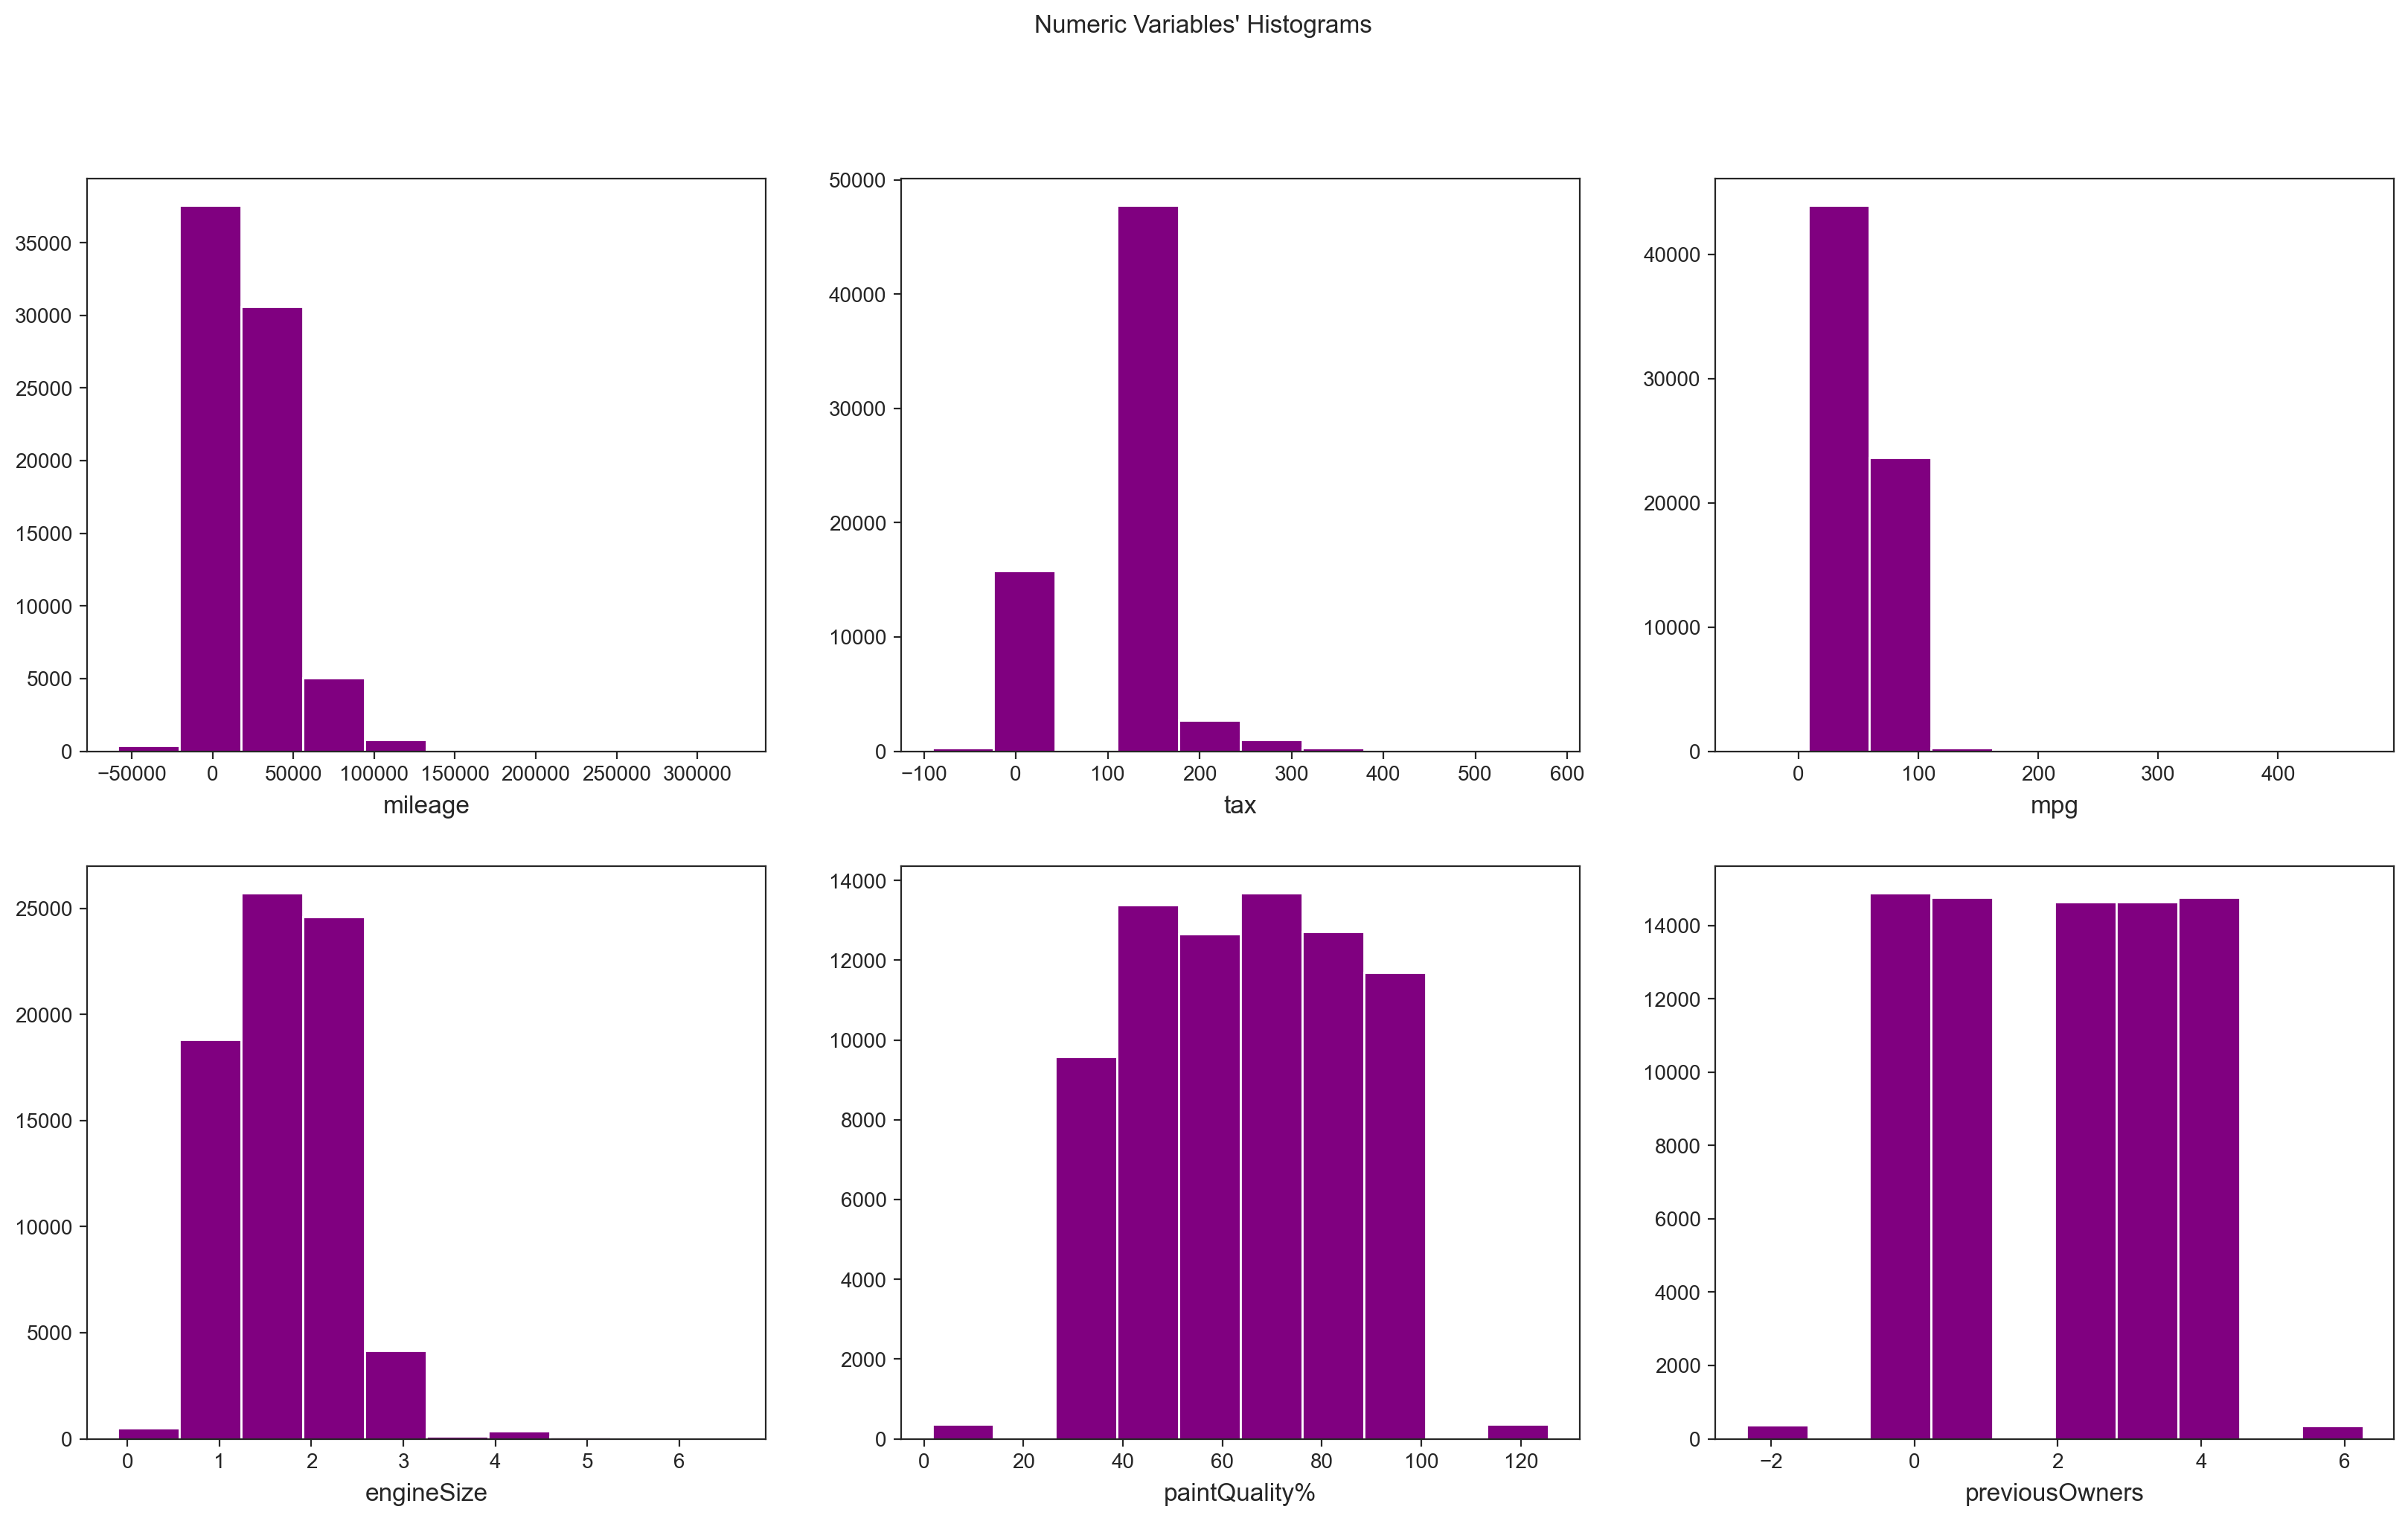

In [32]:
cat_features=["carID", "Brand", "model", "year", "fuelType", "hasDamage", "transmission"]
metric_features=X_train.columns.drop(cat_features).tolist()
print(metric_features)


sp_rows = 2
sp_cols = 3


#Histograms
sns.set_style("ticks")
# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(sp_rows, 
                         sp_cols, 
                         figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each histogram (hint: use the ax.hist() instead of plt.hist()):
for ax, feat in zip(axes.flatten(), metric_features): 
    ax.hist(df_train[feat], color=("purple"))
    ax.set_title(feat, y=-0.13)  
# Layout
plt.suptitle("Numeric Variables' Histograms")

###### ponderar se faz sentido log da 1 e 3 var

Text(0.5, 0.98, 'BoxPlots')

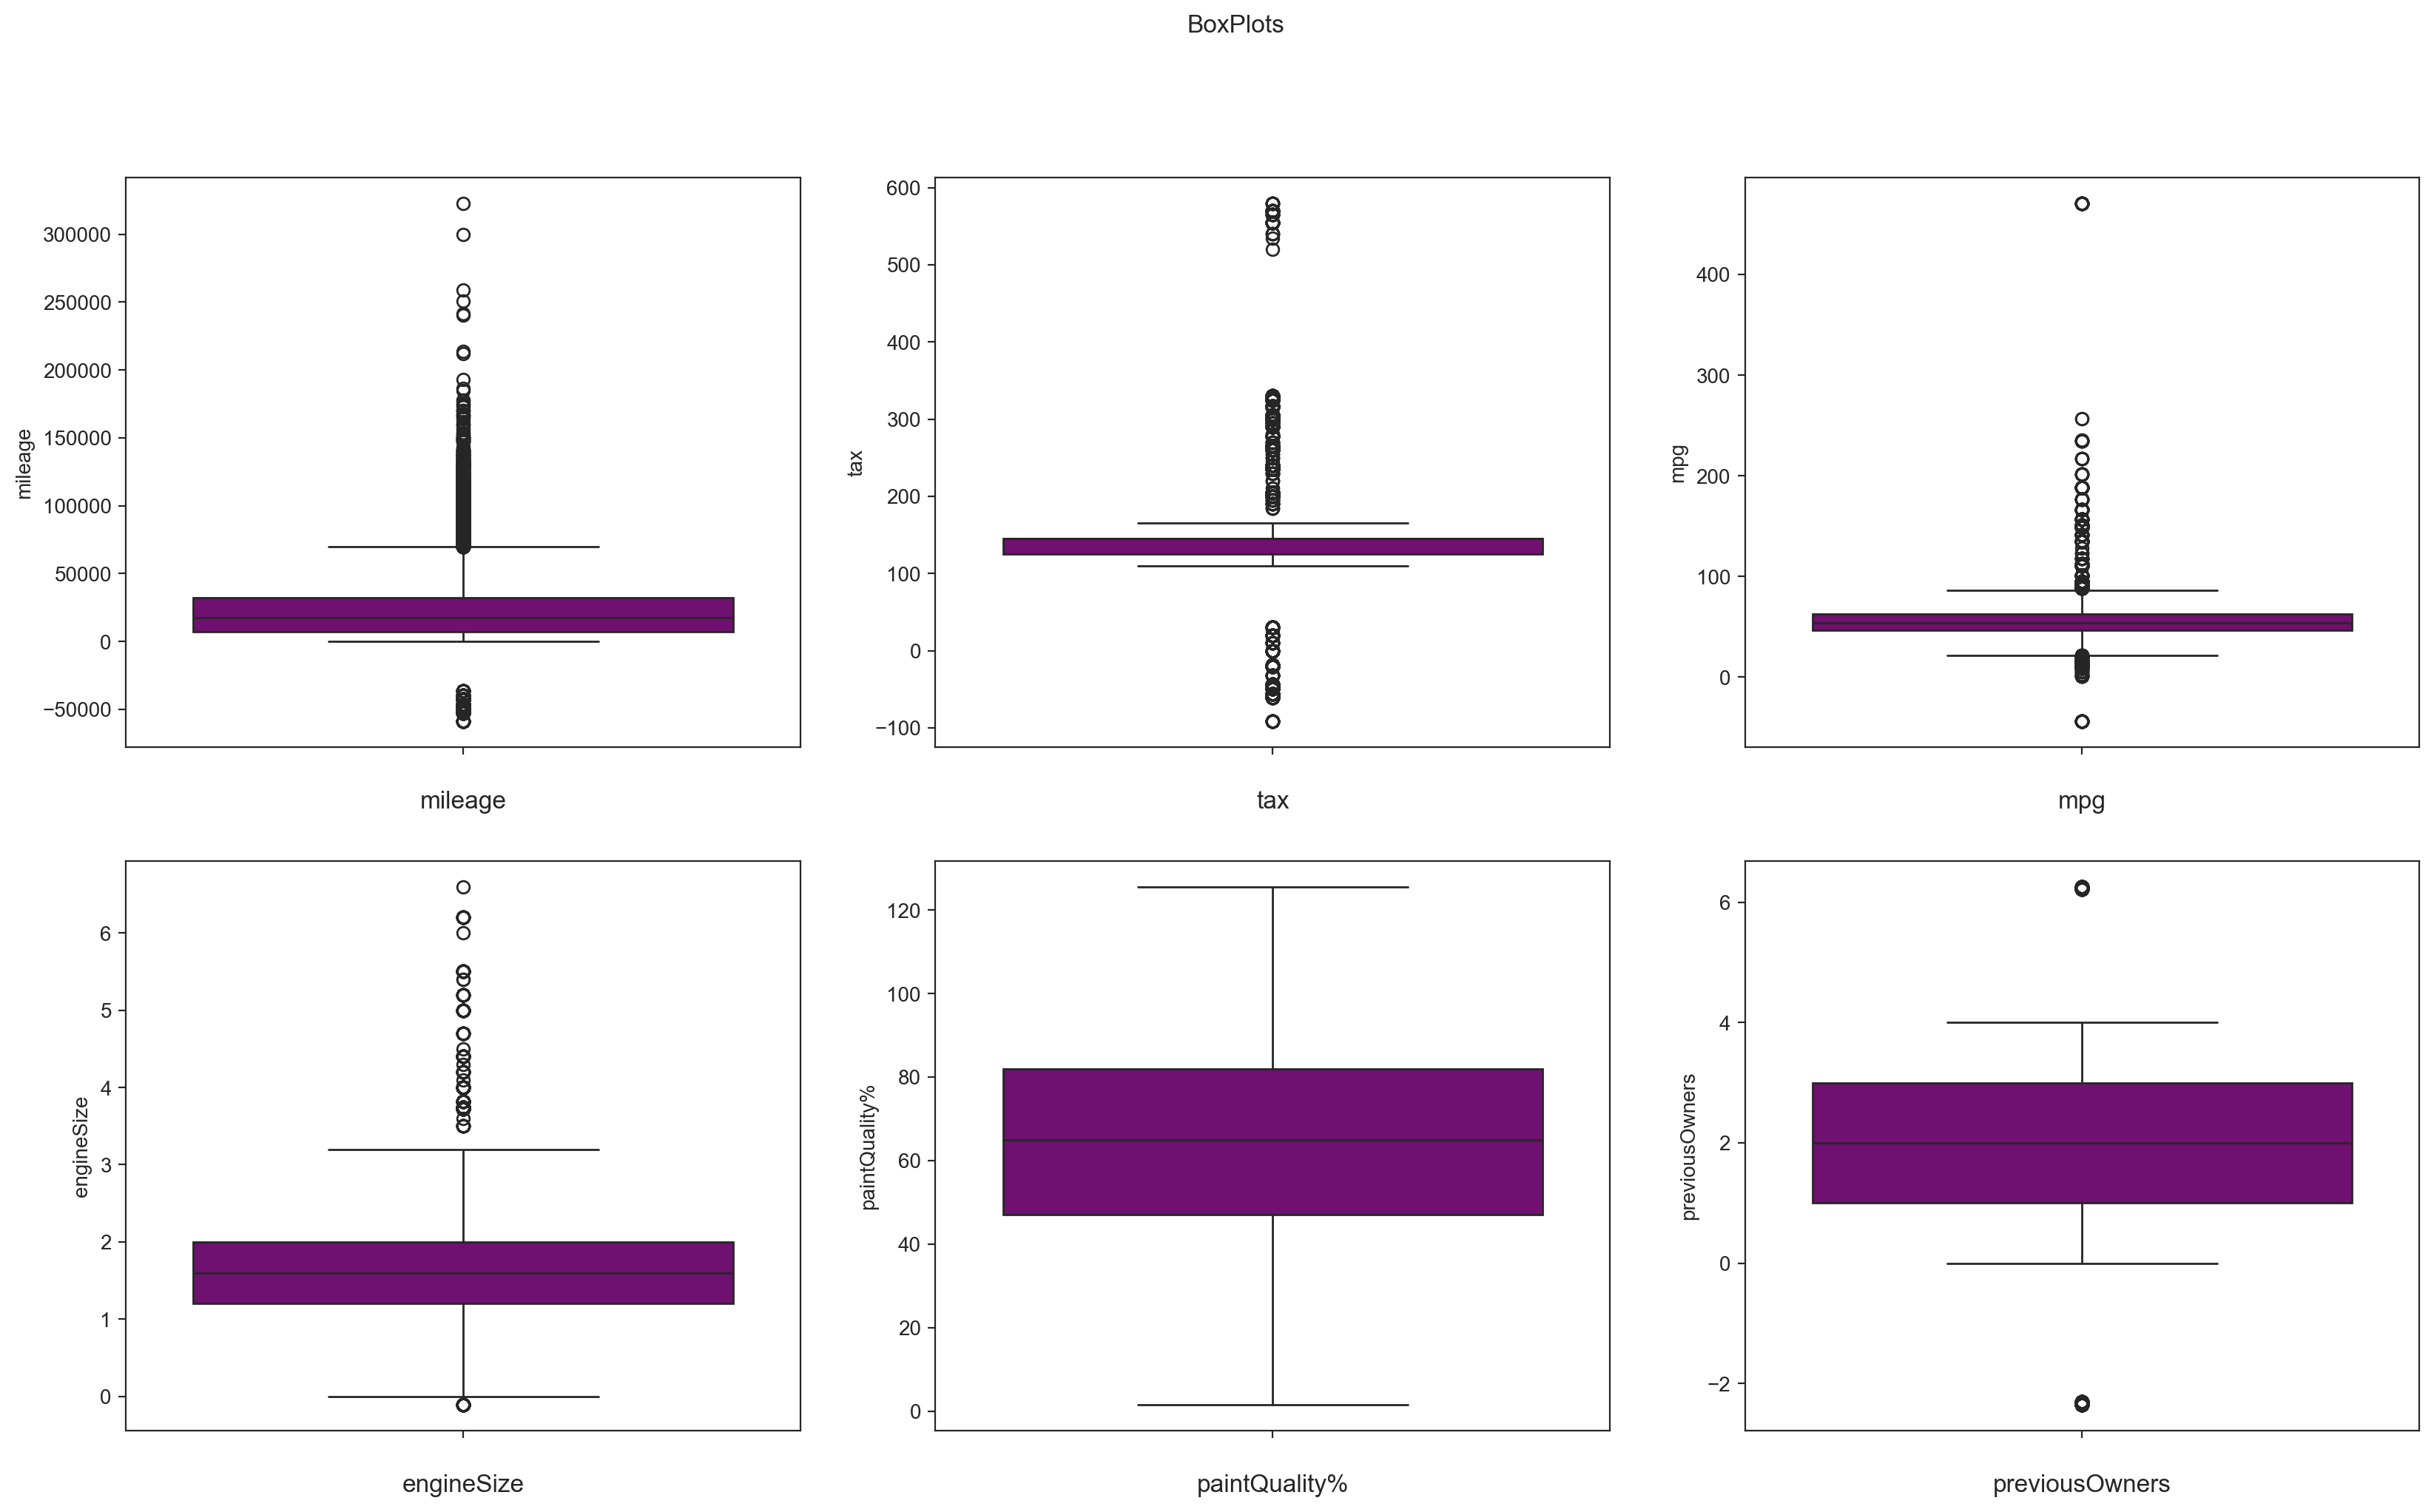

In [33]:
#boxplot
# Prepare figure. Create individual axes where each boxplot will be placed
fig, axes = plt.subplots(sp_rows, 
                         sp_cols, 
                         figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each histogram (hint: use the ax.hist() instead of plt.hist()):
for ax, feat in zip(axes.flatten(), metric_features): 
    sns.boxplot(y=df_train[feat],ax=ax, color=("purple"))
    ax.set_title(feat, y=-0.13) 

plt.suptitle("BoxPlots")

###### em tax e mpg cortar outliers manualmente pelos 400
###### mileage ? engineSize?

Categorical Features

fuelType
Petrol      41181
Diesel      30885
Hybrid       2225
NaN          1511
Other         167
Electric        4
Name: count, dtype: int64

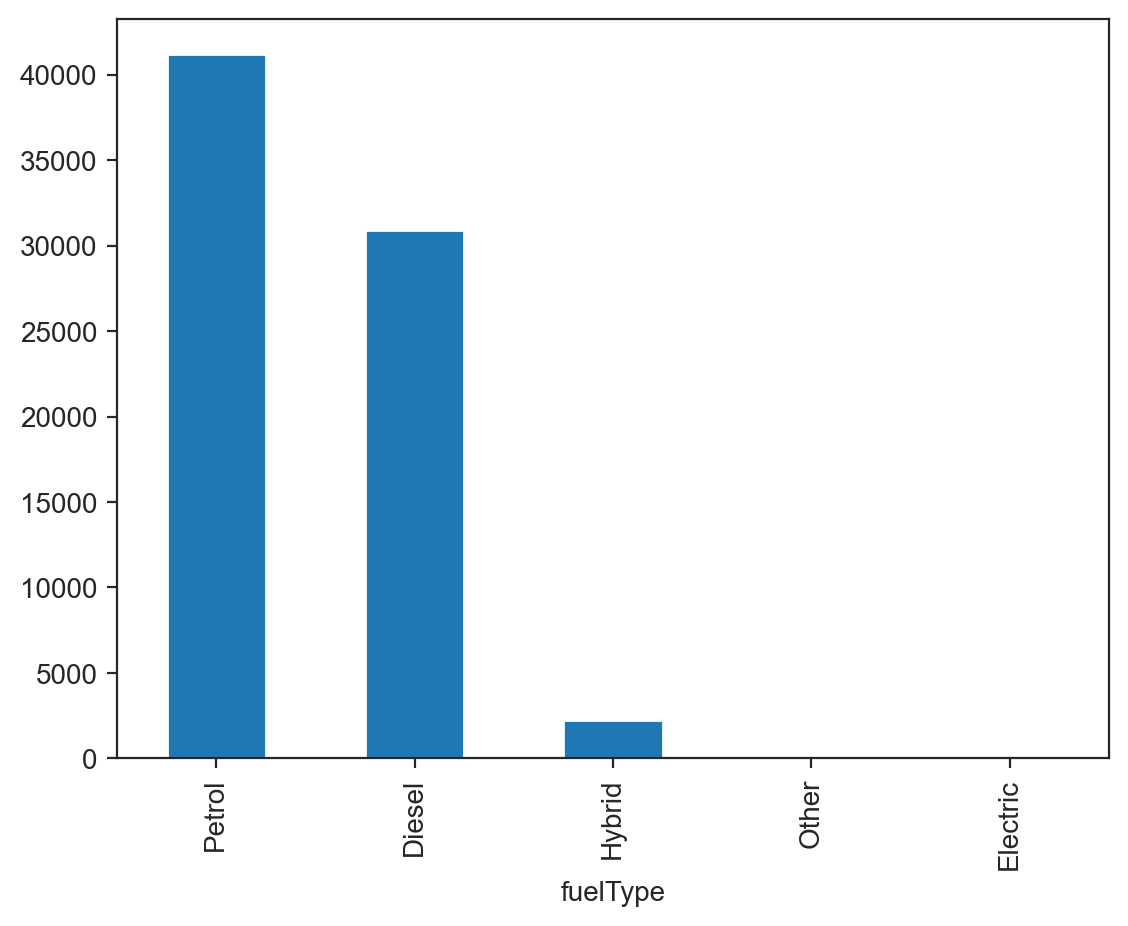

In [34]:
#Typos in the fuel type need to be fixed
#easy way of doing 
"""
import re
X_train["fuelType"] = (
    X_train["fuelType"]
    .str.strip()                      # remove espaços no início/fim
    .str.replace(r"(?i).*diesel.*", "Diesel", regex=True)
    .str.replace(r"(?i).*petrol.*", "Petrol", regex=True)
    .str.replace(r"(?i).*hybrid.*", "Hybrid", regex=True)
    .str.replace(r"(?i).*other.*", "Other", regex=True)
)
"""
diesel_types=["DIESEL","Diese","diesel","iesel","IESEL","DIESE","iese","diese","IESE"]
petrol_types=["petrol","Petro","etrol", "PETROL","petro","etro","ETROL","PETRO","ETRO"]
hybrid_types=["HYBRID", "hybrid","Hybri","ybrid","HYBRI","ybri","YBRID"]
other=["ther","Othe","OTHER","other"]
X_train["fuelType"]=X_train["fuelType"].apply(lambda i: "Diesel" if i in diesel_types else i)
X_train["fuelType"]=X_train["fuelType"].apply(lambda i: "Petrol" if i in petrol_types else i)
X_train["fuelType"]=X_train["fuelType"].apply(lambda i: "Hybrid" if i in hybrid_types else i)
X_train["fuelType"]=X_train["fuelType"].apply(lambda i: "Other" if i in other else i)
X_train["fuelType"].value_counts().plot(kind="bar")

X_train.loc[X_train["fuelType"].isin(["nan"]), "fuelType"] = np.nan
X_train["fuelType"].value_counts(dropna=False)

###### o que fazer com Others? Substituir NaN com moda ou ?

np.int64(1521)

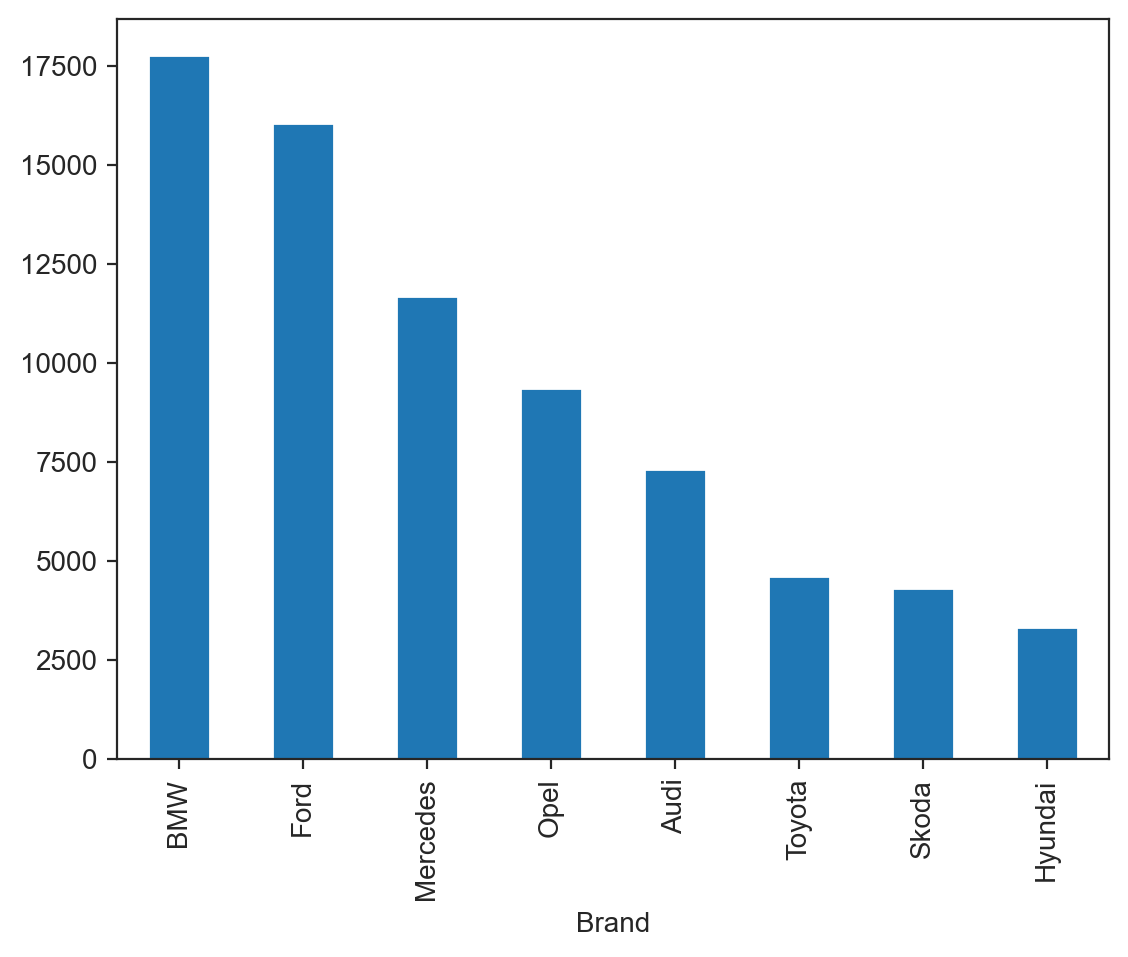

In [35]:
#Typos in the brand need to be fixed
X_train["Brand"].unique()

bmw_types=["w","MW","bmw","BM","W","vw","v","VW","mw","V"]
toyota_types=["Toyot","TOYOTA","toyota","OYOTA","TOYOT","toyot","oyota"]

X_train["Brand"]=X_train["Brand"].apply(lambda i: "BMW" if i in bmw_types else i)
X_train["Brand"]=X_train["Brand"].apply(lambda i: "Toyota" if i in toyota_types else i)
X_train["Brand"]=X_train["Brand"].apply(lambda i: "Skoda" if i in ["KOD","koda","SKOD","KODA","skod","SKODA","Skod","skoda","kod"] else i)
X_train["Brand"]=X_train["Brand"].apply(lambda i: "Audi" if i in ["UD","AUDI","audi","Aud","UDI","AUD","udi","aud","ud"] else i)
X_train["Brand"]=X_train["Brand"].apply(lambda i: "Ford" if i in ["OR","ord","ford","for","ORD"] else i)
X_train["Brand"]=X_train["Brand"].apply(lambda i: "Mercedes" if i in ["Mercede","MERCEDES","ercedes","MERCEDE","ercede","ERCEDES","mercede","mercedes"] else i)
X_train["Brand"]=X_train["Brand"].apply(lambda i: "Opel" if i in ["Ope","OPE","ope","opel","pel","pe","OPEL","PEL"] else i)
X_train["Brand"]=X_train["Brand"].apply(lambda i: "Ford" if i in ["FOR","For","or","FORD"] else i)
X_train["Brand"]=X_train["Brand"].apply(lambda i: "Hyundai" if i in ['yundai', 'Hyunda', 'hyundai','HYUNDAI', 'yunda', 'HYUNDA', 'hyunda'] else i)

X_train["Brand"].unique()
X_train.loc[X_train["Brand"].isin(["nan","Other"]), "Brand"] = np.nan
X_train["Brand"].value_counts().plot(kind="bar")

X_train["Brand"].isna().sum()





In [36]:
#typos in brand type

X_train["model"] = (
    X_train["model"]
    .astype(str)
    .str.strip()
    .str.upper()
)

# Dicionário de normalização
patterns = {
    r".*YAR.*": "Yaris",
    r".*AYG.*": "Aygo",
    r".*COROL.*": "Corolla",
    r".*AURI.*": "Auris",
    r".*AVENSIS.*": "Avensis",
    r".*RAV.*": "RAV4",
    r".*PRIUS.*": "Prius",
    r".*HILU.*": "Hilux",
    r".*VERSO.*": "Verso",
    r".*GT86.*": "GT86",
    r".*C-H.*": "C-HR",
    r".*CAMR.*": "Camry",

    r".*FIEST.*": "Fiesta",
    r".*FOCU.*": "Focus",
    r".*MONDE.*": "Mondeo",
    r".*KUG.*": "Kuga",
    r".*PUMA.*": "Puma",
    r".*KA.*": "Ka+",
    r".*ECOSPORT.*": "EcoSport",
    r".*MUSTANG.*": "Mustang",

    r".*ASTR.*": "Astra",
    r".*CORS.*": "Corsa",
    r".*INSIGN.*": "Insignia",
    r".*ZAFIR.*": "Zafira",
    r".*MOKK.*": "Mokka X",
    r".*GRANDLAND.*": "Grandland X",
    r".*CROSSLAND.*": "Crossland X",
    r".*MERIV.*": "Meriva",
    r".*VECTR.*": "Vectra",
    r".*COMBO.*": "Combo Life",
    r".*ADAM.*": "Adam",
    r".*VIVAR.*": "Vivaro",

    r".*GOLF.*": "Golf",
    r".*PASSAT.*": "Passat",
    r".*POLO.*": "Polo",
    r".*TIGUAN.*": "Tiguan",
    r".*TOURAN.*": "Touran",
    r".*SCIROCCO.*": "Scirocco",
    r".*JETTA.*": "Jetta",
    r".*BEETL.*": "Beetle",
    r".*SHARAN.*": "Sharan",
    r".*TOUAREG.*": "Touareg",
    r".*ARTEON.*": "Arteon",
    r".*T-CROSS.*": "T-Cross",
    r".*T-ROC.*": "T-Roc",
    r".*CADDY.*": "Caddy",
    r".*CARAVEL.*": "Caravelle",

    r".*A[0-9].*": lambda x: x.title(),  # Audi A1, A3, A4, etc.
    r".*Q[0-9].*": lambda x: x.title(),  # Audi Q2, Q3, etc.
    r".*TT.*": "TT",
    r".*RS[0-9].*": lambda x: x.upper(),

    r".*1 SER.*": "1 Series",
    r".*2 SER.*": "2 Series",
    r".*3 SER.*": "3 Series",
    r".*4 SER.*": "4 Series",
    r".*5 SER.*": "5 Series",
    r".*6 SER.*": "6 Series",
    r".*7 SER.*": "7 Series",
    r".*8 SER.*": "8 Series",
    r".*X[1-7].*": lambda x: x.upper(),
    r".*Z[0-4].*": lambda x: x.upper(),
    r".*M[0-9].*": lambda x: x.upper(),
    r".*I[0-9].*": lambda x: x.upper(),

    r".*A CLASS.*": "A Class",
    r".*B CLASS.*": "B Class",
    r".*C CLASS.*": "C Class",
    r".*E CLASS.*": "E Class",
    r".*S CLASS.*": "S Class",
    r".*GLA.*": "GLA Class",
    r".*GLC.*": "GLC Class",
    r".*GLE.*": "GLE Class",
    r".*GLS.*": "GLS Class",
    r".*SL.*": "SL Class",
    r".*CLA.*": "CLA Class",
    r".*CLS.*": "CLS Class",

    r".*FABIA.*": "Fabia",
    r".*OCTAV.*": "Octavia",
    r".*SUPERB.*": "Superb",
    r".*RAPID.*": "Rapid",
    r".*SCALA.*": "Scala",
    r".*KAMIQ.*": "Kamiq",
    r".*KAROQ.*": "Karoq",
    r".*KODIAQ.*": "Kodiaq",
    r".*YETI.*": "Yeti Outdoor",
    r".*CITIGO.*": "Citigo",

    r".*I10.*": "i10",
    r".*I20.*": "i20",
    r".*I30.*": "i30",
    r".*I40.*": "i40",
    r".*IX20.*": "ix20",
    r".*IX35.*": "ix35",
    r".*TUCSON.*": "Tucson",
    r".*SANTA FE.*": "Santa Fe",
    r".*KONA.*": "Kona",
    r".*IONIQ.*": "Ioniq",
    r".*VELOST.*": "Veloster",
    r".*I800.*": "i800",
}

# Aplica os padrões
for pattern, replacement in patterns.items():
    X_train["model"] = X_train["model"].replace(pattern, replacement, regex=True)

# Corrige os "nan"
X_train.loc[X_train["model"].str.lower() == "nan", "model"] = np.nan

# Ajusta capitalização
X_train["model"] = X_train["model"].str.replace(r"\s+", " ", regex=True).str.strip()

X_train["model"].unique()
X_train["model"].isna().sum()


np.int64(12114)

###### remove NaN that are both in Brand and Model

In [37]:
X_train = X_train[~(X_train["model"].isna() & X_train["Brand"].isna())]
X_train.head()

,carID,Brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
0,69512,BMW,Golf,2016.0,Semi-Auto,28421.0,Petrol,NaN,11.417268,2.0,63.0,4.000000,0.0
1,53000,Toyota,Yaris,2019.0,Manual,4589.0,Petrol,145.0,47.900000,1.5,50.0,1.000000,0.0
2,6366,Audi,NaN,2019.0,Semi-Auto,3624.0,Petrol,145.0,40.900000,1.5,56.0,4.000000,0.0
3,29021,Ford,Fiesta,2018.0,anual,9102.0,Petrol,145.0,65.700000,1.0,50.0,-2.340306,0.0
4,10062,BMW,2 Series,2019.0,Manual,1000.0,Petrol,145.0,42.800000,1.5,97.0,3.000000,0.0


marca NaN: ver modelo nao NaN e depois colocar a marca associada a esse modelo
modelo NaN: ver a moda do modelo de cada marca

In [38]:
#typos in transmission
X_train["transmission"]=X_train["transmission"].apply(lambda i: "Semi-Auto" if i in ["Semi_Aut","Semi_Auto","Semi-Aut","SEMI-AUTO","EMI-AUTO","semi-auto","semi-aut","SEMI-AUT","emi-Auto","emi-Aut","emi-auto","Semi-aut"] else i)
X_train["transmission"]=X_train["transmission"].apply(lambda i: "Automatic" if i in ["AUTOMATIC","Automati","utomatic","UTOMATIC","automatic","AUTOMATI","automati","utomati"] else i)
X_train["transmission"]=X_train["transmission"].apply(lambda i: "Manual" if i in ['anual', 'manual', 'Manua', 'MANUAL', ' Manual ', 'ANUAL', 'unknow','manua', 'anua', 'MANUA', ' manual ', ' MANUAL ', ' Manual', 'Manual ', 'manual '] else i)

# Corrigir "nan" falsos
X_train.loc[X_train["transmission"].isin(["nan", "none", "null","unknown","UNKNOWN","nknown","nknow","Other"]), "transmission"] = np.nan

# Ver resultado final
X_train["transmission"].unique()
print(X_train["transmission"].value_counts(dropna=False))



transmission
Manual       41546
Semi-Auto    16800
Automatic    15149
NaN           2238
Name: count, dtype: int64


Transform Year in valid numbers - integers

In [39]:
X_train["year"]=X_train["year"].apply(lambda i: int(i) if isinstance(i,float) and not np.isnan(i) else i)


Flling in missing values

In [40]:
#substitute by mode bc its he most frequent value
df_train["hasDamage"]=df_train["hasDamage"].fillna(df_train["hasDamage"].mode()[0])

#filling with median
for column in X_train.columns:
    if pd.api.types.is_numeric_dtype(X_train[column]):
        
        #store mean of training data in a variable - in a real application, you may need to store these values for future usages on e.g. test data 
        median_to_fill = X_train[column].median()
        
        #fill on X_train
        X_train[column].fillna(median_to_fill, inplace=True)


print(X_train.isna().sum())


carID                 0
Brand              1281
model             11874
year                  0
transmission       2238
mileage               0
fuelType           1506
tax                   0
mpg                   0
engineSize            0
paintQuality%         0
previousOwners        0
hasDamage             0
dtype: int64


C:\Users\Utilizador\AppData\Local\Temp\ipykernel_22028\3858313037.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train[column].fillna(median_to_fill, inplace=True)
C:\Users\Utilizador\AppData\Local\Temp\ipykernel_22028\3858313037.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

Bivariate Analysis

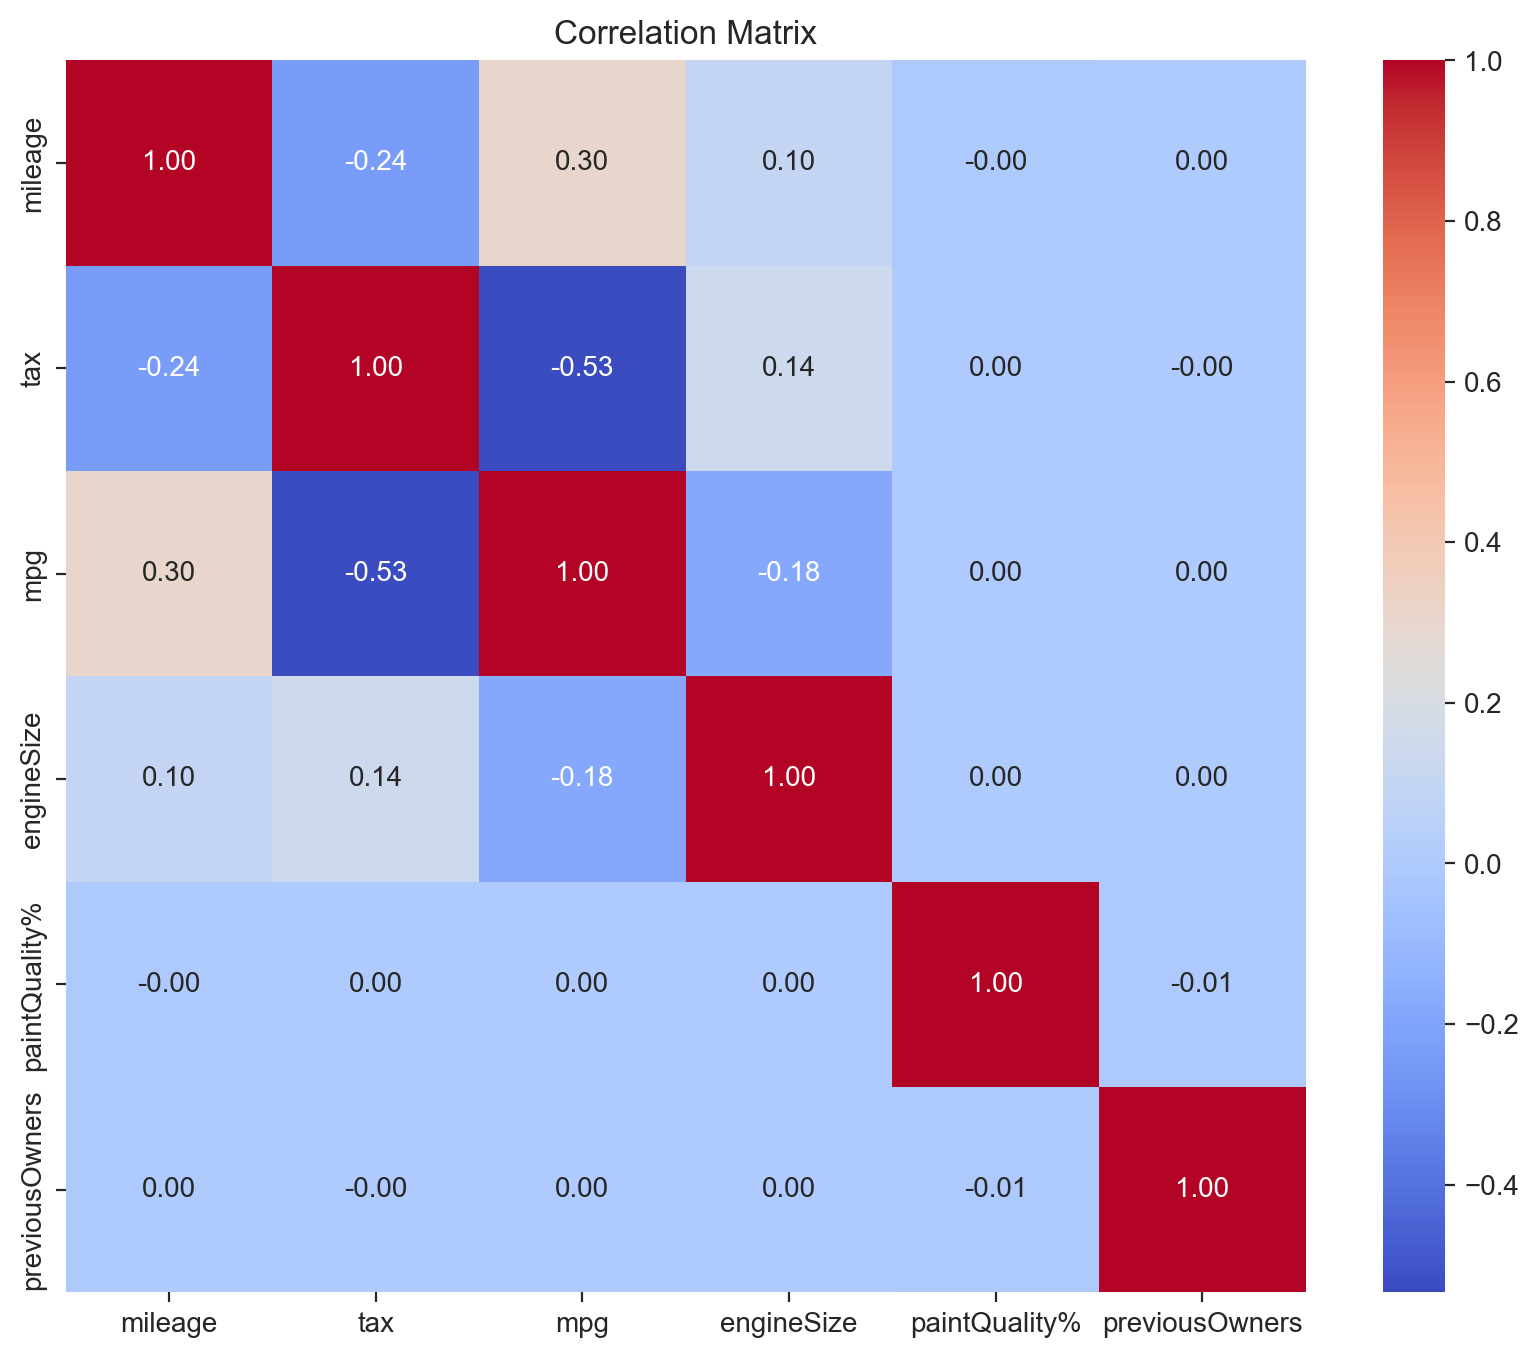

In [41]:
corr = X_train[metric_features].corr(method='spearman')
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

mpg is negatively correlated with tax however all other seems uncorrelated
mileage also positively correlated with mpg which makes sense

In [42]:
pd.crosstab(X_train['Brand'], X_train['model'], margins=True)
pd.crosstab(X_train['transmission'], X_train['fuelType'], margins=True)



fuelType,Diesel,Electric,Hybrid,Other,Petrol,All
transmission,,,,,,
Automatic,7768,3,1867,144,5057,14839
Manual,12859,0,21,18,27827,40725
Semi-Auto,9204,0,266,0,7007,16477
All,29831,3,2154,162,39891,72041


**Outliers**

Doesnt make sense to have a negative tax

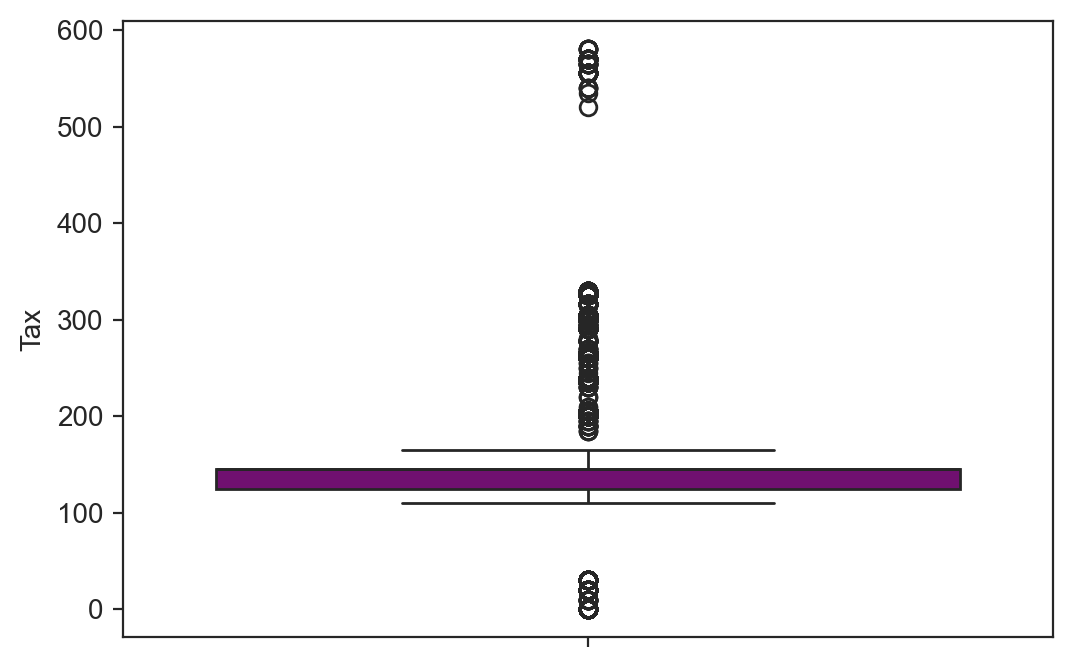

In [43]:
#doesnt make sense to have negative tax
X_train["tax"].unique()
mask=(X_train["tax"]<0)
X_train.loc[mask, "tax"] = 0
X_train["tax"].unique()

plt.figure(figsize=(6,4))
sns.boxplot(y=X_train["tax"], color="purple")
plt.ylabel("Tax")
plt.show()


cleaning outliers in Previous owners

Percentage of data kept after removing outliers: 0.9903


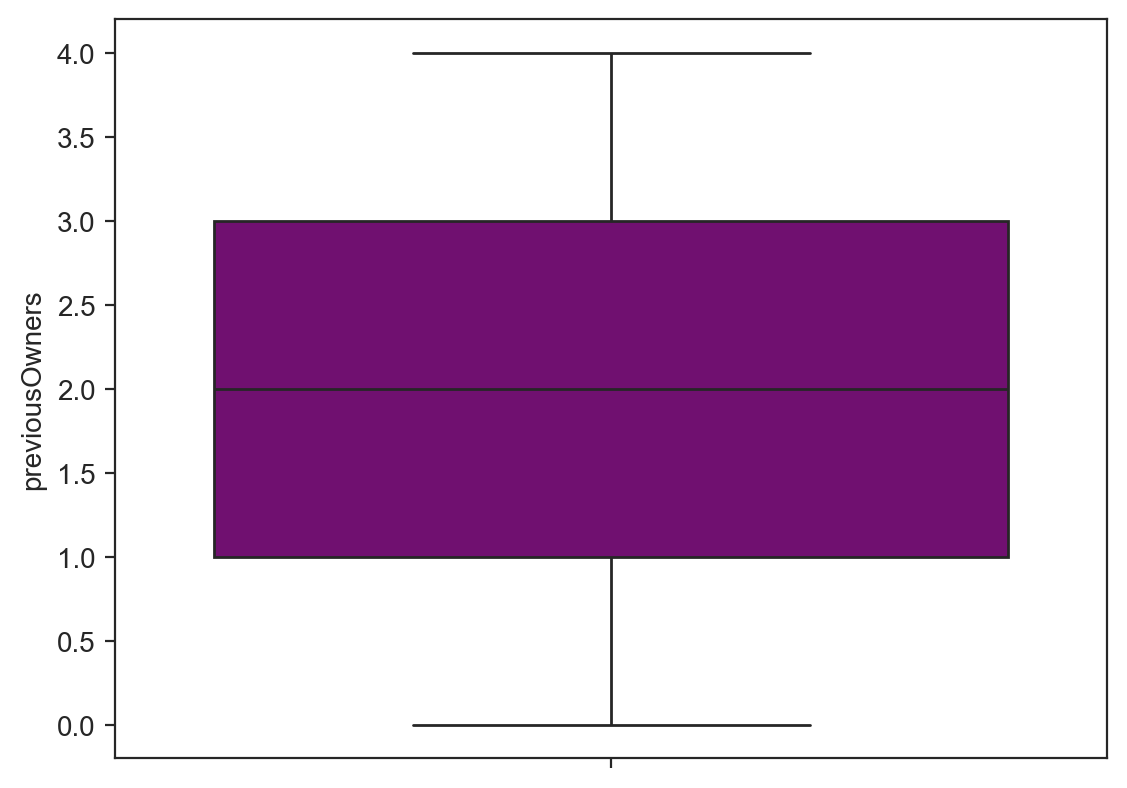

array([4., 1., 3., 0., 2.])

In [44]:

filters_PO = ((X_train['previousOwners']<= 4) & (X_train['previousOwners']>= 0 ))


X_manuallyremoved = X_train[filters_PO]
print('Percentage of data kept after removing outliers:', np.round(X_manuallyremoved.shape[0] / X_train.shape[0], 4))

sns.boxplot(y=X_manuallyremoved["previousOwners"], color="purple")
plt.show()

X_manuallyremoved["previousOwners"].unique()



In [45]:
#Como corrigir os outros outliers e se relamente devem ser retirados?

Creating a feature to check how old the car is

In [46]:
X_train["CarAge"]=2025-X_train["year"]
